In [1]:
import pandas as pd
import os

fname = os.getenv('HOME') + '/aiffel/recommendata_iu/data/lastfm-dataset-360K/usersha1-artmbid-artname-plays.tsv'
col_names = ['user_id', 'artist_MBID', 'artist', 'play']   # 임의로 지정한 컬럼명
data = pd.read_csv(fname, sep='\t', names= col_names)      # sep='\t'로 주어야 tsv를 열 수 있습니다.  
data.head(10)

,user_id,artist_MBID,artist,play
0,00000c289a1829a808ac09c00daf10bc3c4e223b,3bd73256-3905-4f3a-97e2-8b341527f805,betty blowtorch,2137
1,00000c289a1829a808ac09c00daf10bc3c4e223b,f2fb0ff0-5679-42ec-a55c-15109ce6e320,die Ärzte,1099
2,00000c289a1829a808ac09c00daf10bc3c4e223b,b3ae82c2-e60b-4551-a76d-6620f1b456aa,melissa etheridge,897
3,00000c289a1829a808ac09c00daf10bc3c4e223b,3d6bbeb7-f90e-4d10-b440-e153c0d10b53,elvenking,717
4,00000c289a1829a808ac09c00daf10bc3c4e223b,bbd2ffd7-17f4-4506-8572-c1ea58c3f9a8,juliette & the licks,706
5,00000c289a1829a808ac09c00daf10bc3c4e223b,8bfac288-ccc5-448d-9573-c33ea2aa5c30,red hot chili peppers,691
6,00000c289a1829a808ac09c00daf10bc3c4e223b,6531c8b1-76ea-4141-b270-eb1ac5b41375,magica,545
7,00000c289a1829a808ac09c00daf10bc3c4e223b,21f3573f-10cf-44b3-aeaa-26cccd8448b5,the black dahlia murder,507
8,00000c289a1829a808ac09c00daf10bc3c4e223b,c5db90c4-580d-4f33-b364-fbaa5a3a58b5,the murmurs,424
9,00000c289a1829a808ac09c00daf10bc3c4e223b,0639533a-0402-40ba-b6e0-18b067198b73,lunachicks,403


artist_MBID 항목은 우리의 관심사가 아닙니다. 사용하는 컬럼만 남기고 제거하도록 하겠습니다.

In [2]:
# 사용하는 컬럼만 남겨줍니다.
using_cols = ['user_id', 'artist', 'play']
data = data[using_cols]
data.head(10)

,user_id,artist,play
0,00000c289a1829a808ac09c00daf10bc3c4e223b,betty blowtorch,2137
1,00000c289a1829a808ac09c00daf10bc3c4e223b,die Ärzte,1099
2,00000c289a1829a808ac09c00daf10bc3c4e223b,melissa etheridge,897
3,00000c289a1829a808ac09c00daf10bc3c4e223b,elvenking,717
4,00000c289a1829a808ac09c00daf10bc3c4e223b,juliette & the licks,706
5,00000c289a1829a808ac09c00daf10bc3c4e223b,red hot chili peppers,691
6,00000c289a1829a808ac09c00daf10bc3c4e223b,magica,545
7,00000c289a1829a808ac09c00daf10bc3c4e223b,the black dahlia murder,507
8,00000c289a1829a808ac09c00daf10bc3c4e223b,the murmurs,424
9,00000c289a1829a808ac09c00daf10bc3c4e223b,lunachicks,403


In [3]:
data['artist'] = data['artist'].str.lower() # 검색을 쉽게 하기 위해 아티스트 문자열을 소문자로 바꿔줍시다.
data.head(10)

,user_id,artist,play
0,00000c289a1829a808ac09c00daf10bc3c4e223b,betty blowtorch,2137
1,00000c289a1829a808ac09c00daf10bc3c4e223b,die ärzte,1099
2,00000c289a1829a808ac09c00daf10bc3c4e223b,melissa etheridge,897
3,00000c289a1829a808ac09c00daf10bc3c4e223b,elvenking,717
4,00000c289a1829a808ac09c00daf10bc3c4e223b,juliette & the licks,706
5,00000c289a1829a808ac09c00daf10bc3c4e223b,red hot chili peppers,691
6,00000c289a1829a808ac09c00daf10bc3c4e223b,magica,545
7,00000c289a1829a808ac09c00daf10bc3c4e223b,the black dahlia murder,507
8,00000c289a1829a808ac09c00daf10bc3c4e223b,the murmurs,424
9,00000c289a1829a808ac09c00daf10bc3c4e223b,lunachicks,403


첫 번째 유저가 어떤 아티스트의 노래를 듣는지 확인해 봅시다.

In [4]:
condition = (data['user_id']== data.loc[0, 'user_id'])
data.loc[condition]

,user_id,artist,play
0,00000c289a1829a808ac09c00daf10bc3c4e223b,betty blowtorch,2137
1,00000c289a1829a808ac09c00daf10bc3c4e223b,die ärzte,1099
2,00000c289a1829a808ac09c00daf10bc3c4e223b,melissa etheridge,897
3,00000c289a1829a808ac09c00daf10bc3c4e223b,elvenking,717
4,00000c289a1829a808ac09c00daf10bc3c4e223b,juliette & the licks,706
5,00000c289a1829a808ac09c00daf10bc3c4e223b,red hot chili peppers,691
6,00000c289a1829a808ac09c00daf10bc3c4e223b,magica,545
7,00000c289a1829a808ac09c00daf10bc3c4e223b,the black dahlia murder,507
8,00000c289a1829a808ac09c00daf10bc3c4e223b,the murmurs,424
9,00000c289a1829a808ac09c00daf10bc3c4e223b,lunachicks,403


데이터 탐색

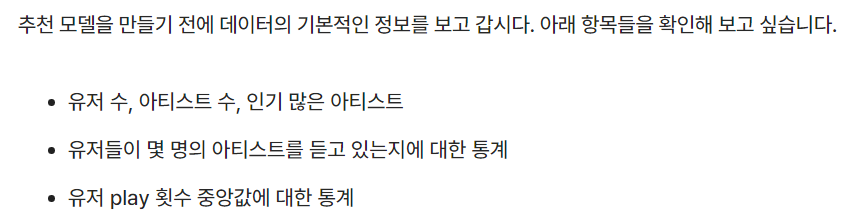

In [5]:
# 유저 수
data['user_id'].nunique()

358868

In [6]:
# 아티스트 수
data['artist'].nunique()

291346

In [7]:
# 인기 많은 아티스트
artist_count = data.groupby('artist')['user_id'].count()
artist_count.sort_values(ascending=False).head(30)

artist
radiohead                77254
the beatles              76245
coldplay                 66658
red hot chili peppers    48924
muse                     46954
metallica                45233
pink floyd               44443
the killers              41229
linkin park              39773
nirvana                  39479
system of a down         37267
queen                    34174
u2                       33206
daft punk                33001
the cure                 32624
led zeppelin             32295
placebo                  32072
depeche mode             31916
david bowie              31862
bob dylan                31799
death cab for cutie      31482
arctic monkeys           30348
foo fighters             30144
air                      29795
the rolling stones       29754
nine inch nails          28946
sigur rós                28901
green day                28732
massive attack           28691
moby                     28232
Name: user_id, dtype: int64

In [8]:
# 유저별 몇 명의 아티스트를 듣고 있는지에 대한 통계
user_count = data.groupby('user_id')['artist'].count()
user_count.describe()

count    358868.000000
mean         48.863234
std           8.524272
min           1.000000
25%          46.000000
50%          49.000000
75%          51.000000
max         166.000000
Name: artist, dtype: float64

In [9]:
# 유저별 play횟수 중앙값에 대한 통계
user_median = data.groupby('user_id')['play'].median()
user_median.describe()

count    358868.000000
mean        142.187676
std         213.089902
min           1.000000
25%          32.000000
50%          83.000000
75%         180.000000
max       50142.000000
Name: play, dtype: float64

모델 검증을 위한 사용자 초기 정보 세팅


우리는 본인의 음악 취향과 가장 유사한 아티스트를 추천받고 싶습니다. 유튜브 뮤직 등 추천 시스템들은 이를 위해서 처음 가입하는 사용자의 취향과 유사한 아티스트 정보를 5개 이상 입력받는 과정을 거치게 하는 경우가 많습니다.
우리도 동일한 과정이 필요합니다. 우리가 만든 추천 시스템의 추후 검증 과정을 위해, '나는 A를 좋아한다.'라는 정보를 위 데이터셋에 5개 이상 추가해 주어야 합니다. 저는 아래와 같이 제가 좋아하는 유명한 아티스트들을 기존의 데이터에 추가해서 넣겠습니다.

In [10]:
# 본인이 좋아하시는 아티스트 데이터로 바꿔서 추가하셔도 됩니다! 단, 이름은 꼭 데이터셋에 있는 것과 동일하게 맞춰주세요. 
my_favorite = ['black eyed peas' , 'maroon5' ,'Taylor Swift' ,'Demi Lovato' ,'beyoncé']

# 'zimin'이라는 user_id가 위 아티스트의 노래를 30회씩 들었다고 가정하겠습니다.
my_playlist = pd.DataFrame({'user_id': ['zimin']*5, 'artist': my_favorite, 'play':[30]*5})

if not data.isin({'user_id':['zimin']})['user_id'].any():  # user_id에 'zimin'이라는 데이터가 없다면
    data = data.append(my_playlist)                           # 위에 임의로 만든 my_favorite 데이터를 추가해 줍니다. 

data.tail(10)       # 잘 추가되었는지 확인해 봅시다.

,user_id,artist,play
17535650,"sep 20, 2008",turbostaat,12
17535651,"sep 20, 2008",cuba missouri,11
17535652,"sep 20, 2008",little man tate,11
17535653,"sep 20, 2008",sigur rós,10
17535654,"sep 20, 2008",the smiths,10
0,zimin,black eyed peas,30
1,zimin,maroon5,30
2,zimin,Taylor Swift,30
3,zimin,Demi Lovato,30
4,zimin,beyoncé,30


모델에 활용하기 위한 전처리

In [11]:
# 고유한 유저, 아티스트를 찾아내는 코드
user_unique = data['user_id'].unique()
artist_unique = data['artist'].unique()

# 유저, 아티스트 indexing 하는 코드 idx는 index의 약자입니다.
user_to_idx = {v:k for k,v in enumerate(user_unique)}
artist_to_idx = {v:k for k,v in enumerate(artist_unique)}

In [12]:
# 인덱싱이 잘 되었는지 확인해 봅니다. 
print(user_to_idx['zimin'])    # 358869명의 유저 중 마지막으로 추가된 유저이니 358868이 나와야 합니다. 
print(artist_to_idx['black eyed peas'])

358868
376


In [13]:
# indexing을 통해 데이터 컬럼 내 값을 바꾸는 코드
# dictionary 자료형의 get 함수는 https://wikidocs.net/16 을 참고하세요.

# user_to_idx.get을 통해 user_id 컬럼의 모든 값을 인덱싱한 Series를 구해 봅시다. 
# 혹시 정상적으로 인덱싱되지 않은 row가 있다면 인덱스가 NaN이 될 테니 dropna()로 제거합니다. 
temp_user_data = data['user_id'].map(user_to_idx.get).dropna()
if len(temp_user_data) == len(data):   # 모든 row가 정상적으로 인덱싱되었다면
    print('user_id column indexing OK!!')
    data['user_id'] = temp_user_data   # data['user_id']을 인덱싱된 Series로 교체해 줍니다. 
else:
    print('user_id column indexing Fail!!')

# artist_to_idx을 통해 artist 컬럼도 동일한 방식으로 인덱싱해 줍니다. 
temp_artist_data = data['artist'].map(artist_to_idx.get).dropna()
if len(temp_artist_data) == len(data):
    print('artist column indexing OK!!')
    data['artist'] = temp_artist_data
else:
    print('artist column indexing Fail!!')

data

user_id column indexing OK!!
artist column indexing OK!!


,user_id,artist,play
0,0,0,2137
1,0,1,1099
2,0,2,897
3,0,3,717
4,0,4,706
...,...,...,...
0,358868,376,30
1,358868,270115,30
2,358868,291347,30
3,358868,291348,30


사용자의 명시적/암묵적 평가

In [14]:
# 1회만 play한 데이터의 비율을 보는 코드
only_one = data[data['play']<2]
one, all_data = len(only_one), len(data)
print(f'{one},{all_data}')
print(f'Ratio of only_one over all data is {one/all_data:.2%}')  # f-format에 대한 설명은 https://bit.ly/2DTLqYU

147740,17535660
Ratio of only_one over all data is 0.84%


In [15]:
# 실습 위에 설명보고 이해해서 만들어보기
from scipy.sparse import csr_matrix

num_user = data['user_id'].nunique()
num_artist = data['artist'].nunique()

csr_data = csr_matrix((data.play, (data.user_id, data.artist)), shape= (num_user, num_artist))
csr_data

<358869x291349 sparse matrix of type '<class 'numpy.int64'>'
	with 17535578 stored elements in Compressed Sparse Row format>

Matrix Factorization(MF)

In [16]:
# 실습 위에 설명보고 이해해서 만들어보기
from scipy.sparse import csr_matrix

num_user = data['user_id'].nunique()
num_artist = data['artist'].nunique()

csr_data = csr_matrix((data.play, (data.user_id, data.artist)), shape= (num_user, num_artist))
csr_data

<358869x291349 sparse matrix of type '<class 'numpy.int64'>'
	with 17535578 stored elements in Compressed Sparse Row format>

In [18]:
from implicit.als import AlternatingLeastSquares
import os
import numpy as np

# implicit 라이브러리에서 권장하고 있는 부분입니다. 학습 내용과는 무관합니다.
os.environ['OPENBLAS_NUM_THREADS']='1'
os.environ['KMP_DUPLICATE_LIB_OK']='True'
os.environ['MKL_NUM_THREADS']='1'

In [19]:
# Implicit AlternatingLeastSquares 모델의 선언
als_model = AlternatingLeastSquares(factors=100, regularization=0.01, use_gpu=False, iterations=15, dtype=np.float32)

In [20]:
# als 모델은 input으로 (item X user 꼴의 matrix를 받기 때문에 Transpose해줍니다.)
csr_data_transpose = csr_data.T
csr_data_transpose

<291349x358869 sparse matrix of type '<class 'numpy.int64'>'
	with 17535578 stored elements in Compressed Sparse Column format>

In [21]:
# 모델 훈련
als_model.fit(csr_data_transpose)

  0%|          | 0/15 [00:00<?, ?it/s]

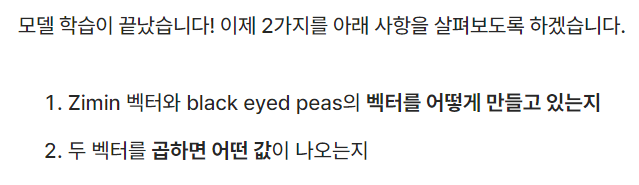

In [22]:
zimin, black_eyed_peas = user_to_idx['zimin'], artist_to_idx['black eyed peas']
zimin_vector, black_eyed_peas_vector = als_model.user_factors[zimin], als_model.item_factors[black_eyed_peas]

print('슝=3')

슝=3


In [23]:
zimin_vector

array([ 0.12241378,  0.16881156,  0.22333342,  0.33536902,  0.07751121,
       -0.6131665 ,  0.57642305, -0.37371796, -0.17658007, -0.07316014,
       -1.1720688 ,  0.5671654 , -0.36130035, -0.65400505, -0.81852853,
        0.12694561, -0.0140948 ,  0.27199814,  0.6127725 ,  0.37137327,
       -0.5811685 , -0.8817297 , -0.7380487 ,  0.26768482,  0.7551151 ,
       -0.22218277,  0.02293793,  0.15102576,  0.2951373 ,  0.07347424,
        0.60960454,  0.3029799 ,  0.39370763,  0.9610551 ,  0.46082404,
       -0.28943524,  0.02520968, -0.3389486 , -0.5596385 ,  0.00286213,
        0.25132856, -0.10805181, -0.1729578 , -0.04328906,  0.43870217,
        0.06597098,  0.69386727,  0.14533845,  0.40924105,  0.8075607 ,
       -0.7010109 , -0.60704863,  0.2891486 , -0.84458315, -0.28677943,
       -0.62750596,  0.16716659, -0.6038058 ,  0.07452033, -0.25202626,
        0.24111976, -0.29533455, -0.44678262,  0.4027575 , -0.4063945 ,
       -0.4240449 , -0.38036758,  0.4590969 ,  0.68969035, -0.02

In [24]:
black_eyed_peas_vector

array([ 0.00854817, -0.00184582,  0.01374248,  0.02475394, -0.006586  ,
       -0.00285473,  0.00808471, -0.00422299,  0.00773627,  0.00205771,
       -0.01543146,  0.01212363,  0.00947652, -0.01824612,  0.00327515,
        0.01500933, -0.0005102 ,  0.01852826,  0.02482697,  0.00972873,
       -0.00232707, -0.00735756, -0.00523343,  0.0078014 ,  0.01675333,
       -0.00075129,  0.00993327,  0.01057992,  0.01682946,  0.01022973,
        0.01952303,  0.01139077,  0.00733682,  0.02473262,  0.01343502,
       -0.00543777,  0.01235265, -0.00699526, -0.01285095,  0.01374173,
        0.00327257,  0.00500304,  0.01097636,  0.00237664,  0.01226377,
        0.00710732,  0.0210502 ,  0.01744648,  0.02148089,  0.02703978,
       -0.01626176, -0.00639079,  0.02168269, -0.02069402,  0.00109138,
        0.00163774,  0.00589712, -0.00551065,  0.00925723, -0.00079311,
        0.01390957, -0.00165486, -0.00037142,  0.01165185,  0.00667566,
        0.00217386,  0.00510923,  0.02672613,  0.0210213 ,  0.01

In [25]:
# zimin과 black_eyed_peas를 내적하는 코드
np.dot(zimin_vector, black_eyed_peas_vector)

0.41648194

이런, 1이 나와야 될 것 같은데 한참 낮은 수치인 0.41 정도가 나왔습니다. factors를 늘리거나 iterations를 늘려야 할 것 같습니다. 이후 진행되는 내용은 일단 이렇게 학습된 모델을 사용하겠습니다.

그렇다면 모델이 저의 maroon5에 대한 선호도를 어떻게 예측할지 한 번 보겠습니다.

In [28]:
maroon5 = artist_to_idx['maroon5']
maroon5_vector = als_model.item_factors[maroon5]
np.dot(zimin_vector, maroon5_vector)

0.0006193441

13-8. 비슷한 아티스트 찾기 + 유저에게 추천하기

AlternatingLeastSquares 클래스에 구현되어 있는 similar_items 메서드를 통하여 비슷한 아티스트를 찾습니다. 처음으로는 제가 좋아하는 coldplay로 찾아보겠습니다.

In [29]:
favorite_artist = 'coldplay'
artist_id = artist_to_idx[favorite_artist]
similar_artist = als_model.similar_items(artist_id, N=15)
similar_artist

[(62, 0.99999994),
 (277, 0.9879862),
 (28, 0.9836237),
 (5, 0.97972804),
 (473, 0.9705861),
 (490, 0.9667462),
 (217, 0.9612339),
 (418, 0.9608637),
 (247, 0.95299727),
 (694, 0.95212734),
 (910, 0.94566405),
 (55, 0.9369606),
 (268, 0.9366097),
 (1018, 0.9361246),
 (782, 0.93424875)]

(아티스트의 id, 유사도) Tuple 로 반환하고 있습니다. 아티스트의 id를 다시 아티스트의 이름으로 매핑 시켜 주겠습니다.

In [30]:
#artist_to_idx 를 뒤집어, index로부터 artist 이름을 얻는 dict를 생성합니다. 
idx_to_artist = {v:k for k,v in artist_to_idx.items()}
[idx_to_artist[i[0]] for i in similar_artist]

['coldplay',
 'muse',
 'the killers',
 'red hot chili peppers',
 'placebo',
 'oasis',
 'radiohead',
 'u2',
 'the beatles',
 'foo fighters',
 'nirvana',
 'arctic monkeys',
 'pink floyd',
 'the smashing pumpkins',
 'the white stripes']

In [31]:
def get_similar_artist(artist_name: str):
    artist_id = artist_to_idx[artist_name]
    similar_artist = als_model.similar_items(artist_id)
    similar_artist = [idx_to_artist[i[0]] for i in similar_artist]
    return similar_artist

print("슝=3")

슝=3


In [32]:
get_similar_artist('2pac')

['2pac',
 '50 cent',
 'notorious b.i.g.',
 'dr. dre',
 'nas',
 'the game',
 'jay-z',
 'snoop dogg',
 'dmx',
 'ice cube']

In [33]:
get_similar_artist('lady gaga')

['lady gaga',
 'britney spears',
 'rihanna',
 'katy perry',
 'beyoncé',
 'the pussycat dolls',
 'christina aguilera',
 'kelly clarkson',
 'justin timberlake',
 'leona lewis']

In [34]:
get_similar_artist('Taylor Swift')

['Taylor Swift',
 'Demi Lovato',
 'sesam-o',
 'porto da pedra',
 'grande rio',
 'los elegidos',
 'beyoncé feat. slim thug',
 '1britney spears',
 'the mental attack',
 'quelque chose']

유저에게 아티스트 추천하기

AlternatingLeastSquares 클래스에 구현되어 있는 recommend 메서드를 통하여 제가 좋아할 만한 아티스트를 추천받습니다. filter_already_liked_items 는 유저가 이미 평가한 아이템은 제외하는 Argument입니다.

In [35]:
user = user_to_idx['zimin']
# recommend에서는 user*item CSR Matrix를 받습니다.
artist_recommended = als_model.recommend(user, csr_data, N=20, filter_already_liked_items=True)
artist_recommended

[(350, 0.36702454),
 (369, 0.35066122),
 (1800, 0.34853658),
 (550, 0.3466447),
 (391, 0.33329484),
 (618, 0.3112535),
 (2249, 0.30505627),
 (1777, 0.29954976),
 (901, 0.29712456),
 (5555, 0.29677057),
 (354, 0.2949633),
 (534, 0.29070142),
 (7317, 0.28543824),
 (621, 0.28121948),
 (637, 0.27949497),
 (611, 0.27029482),
 (899, 0.2701124),
 (358, 0.2665377),
 (4803, 0.2646218),
 (564, 0.2594142)]

In [36]:
[idx_to_artist[i[0]] for i in artist_recommended]

['rihanna',
 'justin timberlake',
 'lady gaga',
 'britney spears',
 'christina aguilera',
 'the pussycat dolls',
 'katy perry',
 'mariah carey',
 'pink',
 'timbaland',
 'nelly furtado',
 'gwen stefani',
 'fergie',
 'alicia keys',
 'akon',
 'chris brown',
 'kylie minogue',
 'kelly clarkson',
 'ne-yo',
 'kanye west']

In [38]:
rihanna = artist_to_idx['rihanna']
explain = als_model.explain(user, csr_data, itemid=rihanna)

In [39]:
[(idx_to_artist[i[0]], i[1]) for i in explain[1]]

[('beyoncé', 0.2266452488373933),
 ('black eyed peas', 0.14253357903445488),
 ('Demi Lovato', -6.831223612567078e-05),
 ('Taylor Swift', -7.485985608320734e-05),
 ('maroon5', -0.00012945388798732635)]

모델은 몇 가지 아쉬운 점이 있습니다.

1.유저, 아티스트에 대한 Meta 정보를 반영하기 쉽지 않습니다. 연령대별로 음악 취향이 굉장히 다르지 않을까요?

2. 유저가 언제 play 했는지에 반영하기 쉽지 않습니다. 10년 전에 즐겨듣던 아티스트와 지금 즐겨듣는 아티스트를 비교해 보세요.

이러한 이유와 딥러닝의 발전으로 MF 이외의 모델 구조도 많이 연구/ 사용되고 있습니다. 하지만 어떤 추천 모델도 핵심은 MF와 비슷합니다.
유저와 아이템에 대한 벡터를 잘 학습하여 취향에 맞게(유저에 맞게) 아이템을 보여주거나(Retrieval) 걸러내는(Filtering) 역할입니다.